In [19]:
#Earthquake Dataset Mining

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
attr  = ['publicid','eventtype',
         'origintime','modificationtime',
         'longitude','latitude',
         'magnitude','depth',
         'magnitudetype', 'depthtype',
         'evaluationmethod','evaluationstatus',
         'evaluationmode','earthmodel',
         'usedphasecount','usedstationcount',
         'magnitudestationcount', 'minimumdistance',
         'azimuthalgap', 'originerror',
         'magnitudeuncertainty', 'distance']

# publicid eventtype
# origintime modificationtime
# longitude latitude
# magnitude depth
# magnitudetype depthtype
# evaluationmethod evaluationstatus
# evaluationmode earthmodel
# usedphasecount usedstationcount
# magnitudestationcount minimumdistance
# azimuthalgap originerror
# magnitudeuncertainty distance


In [21]:
dFrame = pd.read_csv('aftershockDataset.csv')

In [22]:
quakeRecArr  = dFrame.to_records(index=False)

In [23]:
 #we must convert to ndarray
quakeNDArr = np.array(quakeRecArr.tolist())
print("type of quakeRecArr: " + str(type(quakeRecArr)))
print("type of quakeNDArr: " + str(type(quakeNDArr)))

type of quakeRecArr: <class 'numpy.recarray'>
type of quakeNDArr: <class 'numpy.ndarray'>


In [24]:
print(quakeRecArr.dtype.names)
print("\n")
print(quakeNDArr.dtype.names)

('publicid', 'eventtype', 'origintime', 'modificationtime', 'longitude', ' latitude', ' magnitude', ' depth', 'magnitudetype', ' depthtype', 'evaluationmethod', ' evaluationstatus', ' evaluationmode', ' earthmodel', ' usedphasecount', 'usedstationcount', 'magnitudestationcount', ' minimumdistance', 'azimuthalgap', 'originerror', 'magnitudeuncertainty', 'distance')


None


In [25]:
quakeNDArr[0][4]

'172.16794'

In [26]:
def eyeBallData (data):
    N = len(data)
    firstEntry = data[0]
    firstV = data[:5]
    lastInst = data[N-1]
    Nattr = len(data[0])
    nomDtype = data.dtype.names
    
    return (N, firstEntry, firstV , lastInst , Nattr, nomDtype)

decomposeData = eyeBallData(quakeRecArr)

print("The dataset quake Aftershock has " + str(decomposeData[0]) + " entries.\n\n" +
      "Here is the first Entry:\n" + str(decomposeData[1]) + "\n\n" +
      "Here are the first 5:\n" + str(decomposeData[2]) + "\n\n" +
      "Here is the last one:\n" + str(decomposeData[3]) + "\n\n" + #last
      "Each entry has: " + str(decomposeData[4]) + ' attributes. They are ' + str(decomposeData[5])
     )

In [1]:
#your class tonight is to muck about with the data
#Task create a subTable called spatialDat with only longitude, latitude, magnitude, depth params

from matplotlib import pyplot as plot
longData = quakeRecArr['longitude']
latData = quakeRecArr[' latitude']
depthData = quakeRecArr[' depth']
magData = quakeRecArr[' magnitude']

expTable = np.zeros((decomposeData[0], 4))

expTable[: ,0] = longData
expTable[: ,1] = latData
expTable[: ,2] = depthData
expTable[: ,3] = magData 

#write a function that plots clusters you give nthe args
def plotPos(datTable):    
    figure = plot.figure()
    ax = figure.add_subplot(111)
    plot.suptitle('Latitude and Longitude', fontsize=16)
    ax.plot(datTable['longitude'], datTable[' latitude'], 
            '+', 
            ms=0.5, 
            c='blue' , 
            mew = 1.2, 
            alpha = 8.0,
            label='Longitude and Latitude')
    
    fig.set_size_inches(6,6)
    
    #FInd that Bloody Outlier
    plot.axvline(x=172.925, color = 'red', alpha=0.2, markersize=2)
    plot.axhline(y=-42.673, color = 'red', alpha=0.2, markersize=2)
    
    plot.axvline(x=172.16794, color = 'red', alpha=0.2, markersize=2)
    plot.axhline(y=-43.52731, color = 'red', alpha=0.2, markersize=2)
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plot.grid()
    plot.show()
    
    #plot points
    
def plotMagDepth(datTable):
        
    figure = plot.figure()
    ax = figure.add_subplot(111)
    plot.suptitle('Depth and Magnitude', fontsize=16)
    ax.plot(datTable[' depth'], datTable[' magnitude'],
            '+', 
            ms=0.5, 
            c='blue', 
            mew = 1.2, 
            alpha =8.5 ,
            label='Magnitude and Depth')
    plot.axvline(x=11.0426, color = 'red', alpha=0.2, markersize=2)
    plot.axhline(y=7.2, color = 'red',alpha=0.2, markersize=2)
    
    ax.set_xlabel('Depth')
    ax.set_ylabel('Magnitude')
    plot.grid()
    plot.show()
    
    #plot points
    
def plotPosIntensift(datTable):
    #if 
    print("WOK")
    
def plotKMeanScatter(kMeanTable , kMeanModel):
    from sklearn.cluster import KMeans  
    fig = plot.figure()
    ax = fig.add_subplot(111)

    ax.scatter(longLatTab[:,0], longLatTab[:,1],c=kMeanModel.labels_, cmap='rainbow', alpha =0.5,  edgecolor='k')
    ax.scatter(kMeanModel.cluster_centers_[:,0] ,kMeanModel.cluster_centers_[:,1], color='black')  
    fig.savefig('matplotlibs\Plot.png')
    
    ax.set_xlabel('$longitude$')
    ax.set_ylabel('$latitude$')
    
    plot.grid()
    plot.show()

NameError: name 'quakeRecArr' is not defined

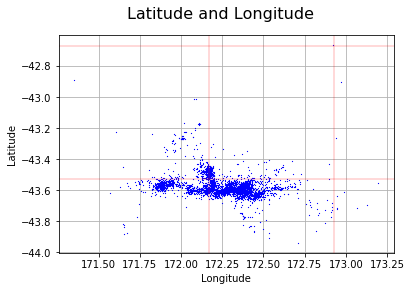

In [88]:
plotPos(quakeRecArr)

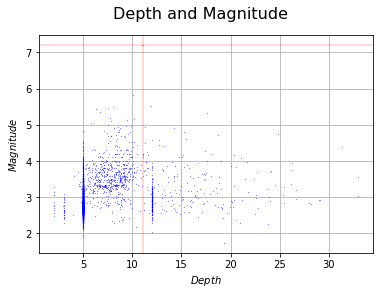

In [58]:
plotMagDepth(quakeRecArr)

In [16]:
decomposeExp = eyeBallData(expTable)

print("The sub-dataset quake Aftershock has " + str(decomposeExp[0]) + " entries.\n\n" +
      "Here is the first Entry:\n" + str(decomposeExp[1]) + "\n\n" +
      "Here are the first 5:\n" + str(decomposeExp[2]) + "\n\n" +
      "Here is the last one:\n" + str(decomposeExp[3]) + "\n\n" + #last
      "Each entry has: " + str(decomposeExp[4]) + ' attributes. They are ' + str(decomposeExp[5])
     )

The sub-dataset quake Aftershock has 3290 entries.

Here is the first Entry:
[172.16794 -43.52731  11.0426    7.2    ]

Here are the first 5:
[[172.16794 -43.52731  11.0426    7.2    ]
 [172.32367 -43.55426  10.0257    5.815  ]
 [172.38512 -43.6585    7.8273    5.114  ]
 [172.29477 -43.5661   11.8823    5.532  ]
 [172.18575 -43.4711    6.2919    5.434  ]]

Here is the last one:
[171.75114 -43.56247   5.        2.662  ]

Each entry has: 4 attributes. They are None


In [17]:
#Now Do preprocessing

#your taks is to write a module that breaks down the data set, tell me more, surface

#missing values
#0 values
#repetitive value

In [18]:
import math

print("Minimum longitude: " + str(expTable[:,0].min()))
print("Minimum longitude: " + str(expTable[:,0].max()))

diffLongDeg = expTable[:,0].max() - expTable[:,0].min()
diffLongKm = 40075*(math.cos(diffLongDeg)/360)

#Length in meters of 1° of longitude = 40075 km * cos( latitude ) / 360

print("\nDistance across :" + str(diffLongDeg) + " degrees")
print("Distance across :" + str(diffLongKm) + " km\n")

print("Minimum latitude: " + str(expTable[:,1].min()))
print("Minimum latitude: " + str(expTable[:,1].max()))

#Length in meters of 1° of latitude = always 111.32 km

diffLatDeg = expTable[:,1].max() - expTable[:,1].min()
diffLatKm = 111.32*diffLatDeg
print("\nDistance upwards :" + str(diffLatDeg) + " degrees")
print("Distance upwards :" + str(diffLatKm) + " km\n")

#######################################################################

area = diffLongKm*diffLatKm
print("The are we are looking at is the size of: " + str(area) + " km square")


Minimum longitude: 171.35031
Minimum longitude: 173.19609

Distance across :1.8457799999999907 degrees
Distance across :-30.226704960595477 km

Minimum latitude: -43.93907
Minimum latitude: -42.66803

Distance upwards :1.2710399999999993 degrees
Distance upwards :141.4921727999999 km

The are we are looking at is the size of: -4276.84216145919 km square


In [19]:
longLatTab = np.zeros((decomposeData[0], 2))

longLatTab[: ,0] = quakeRecArr['longitude']
longLatTab[: ,1] = quakeRecArr[' latitude']

decomposeSubTable = eyeBallData(longLatTab)

print("The sub-dataset quake Aftershock has " + str(decomposeSubTable[0]) + " entries.\n\n" +
      "Here is the first Entry:\n" + str(decomposeSubTable[1]) + "\n\n" +
      "Here are the first 5:\n" + str(decomposeSubTable[2]) + "\n\n" +
      "Here is the last one:\n" + str(decomposeSubTable[3]) + "\n\n" + #last
      "Each entry has: " + str(decomposeSubTable[4]) + ' attributes. They are ' + str(decomposeSubTable[5])
     )

The sub-dataset quake Aftershock has 3290 entries.

Here is the first Entry:
[172.16794 -43.52731]

Here are the first 5:
[[172.16794 -43.52731]
 [172.32367 -43.55426]
 [172.38512 -43.6585 ]
 [172.29477 -43.5661 ]
 [172.18575 -43.4711 ]]

Here is the last one:
[171.75114 -43.56247]

Each entry has: 2 attributes. They are None


In [24]:
#wtf not working
#just send a table

def modelNPlotKMean(longLatTab):
    from sklearn.cluster import KMeans
    import csv
    
    print("This function takes in table arguement then returns a k mean cluster center")
    
    kmean = KMeans(n_clusters=4) #wtf not working ha
    
    kmean.fit(longLatTab)
    
    plotKMeanScatter(longLatTab, kmean)
    #one limitation of the k mean clustering method is that the centroids change for every iteration
    print(kmean.cluster_centers_)
    
    with open("kMeanShiftingCentroidCapture.csv",'ab') as file:
        #watch as the centroids shift over time
        np.savetxt(file, kmean.cluster_centers_ , fmt='%.20f', delimiter = ",", newline='\n',)
        np.savetxt(file, [[]], fmt='%.20f', delimiter = ",", newline='\n',)
        
        #calcualte shifting centroid distance?
    
    len(kmean.labels_)

This function takes in table arguement then returns a k mean cluster center


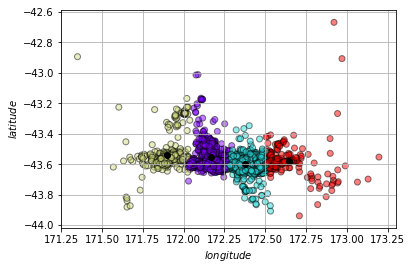

[[172.16789114 -43.55356672]
 [172.37853342 -43.5996577 ]
 [171.89810312 -43.54036585]
 [172.64296481 -43.57655425]]


In [25]:
#cluster Longitude and Latitude
modelNPlotKMean(longLatTab)
#wtf not working

The sub-dataset quake Aftershock has 3290 entries.

Here is the first Entry:
[172.16794 -43.52731  11.0426 ]

Here are the first 5:
[[172.16794 -43.52731  11.0426 ]
 [172.32367 -43.55426  10.0257 ]
 [172.38512 -43.6585    7.8273 ]
 [172.29477 -43.5661   11.8823 ]
 [172.18575 -43.4711    6.2919 ]]

Here is the last one:
[171.75114 -43.56247   5.     ]

Each entry has: 3 attributes. They are None

Three Variable K Mean Longitude Latitude Depth: 

This function takes in table arguement then returns a k mean cluster center


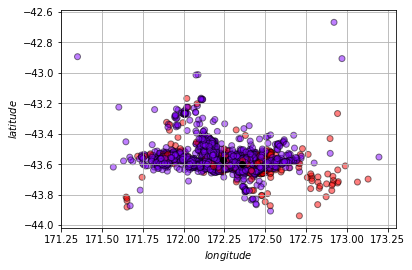

[[172.23980966 -43.57173033   5.53179553]
 [172.35550933 -43.59615763  14.53207994]]


In [22]:
#make a 3 column table

longLatDepthTab = np.zeros((decomposeData[0], 3))

longLatDepthTab[: ,0] = quakeRecArr['longitude']
longLatDepthTab[: ,1] = quakeRecArr[' latitude']
longLatDepthTab[: ,2] = quakeRecArr[' depth']

decomposeSubTable = eyeBallData(longLatDepthTab)

print("The sub-dataset quake Aftershock has " + str(decomposeSubTable[0]) + " entries.\n\n" +
      "Here is the first Entry:\n" + str(decomposeSubTable[1]) + "\n\n" +
      "Here are the first 5:\n" + str(decomposeSubTable[2]) + "\n\n" +
      "Here is the last one:\n" + str(decomposeSubTable[3]) + "\n\n" + #last
      "Each entry has: " + str(decomposeSubTable[4]) + ' attributes. They are ' + str(decomposeSubTable[5])
     )

print("\nThree Variable K Mean Longitude Latitude Depth: \n")

modelNPlotKMean(longLatDepthTab)

In [23]:
#Now do Evaluation/Validation/Tuning